<a href="https://colab.research.google.com/github/salin-shain/PRODIGY_DS_01/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

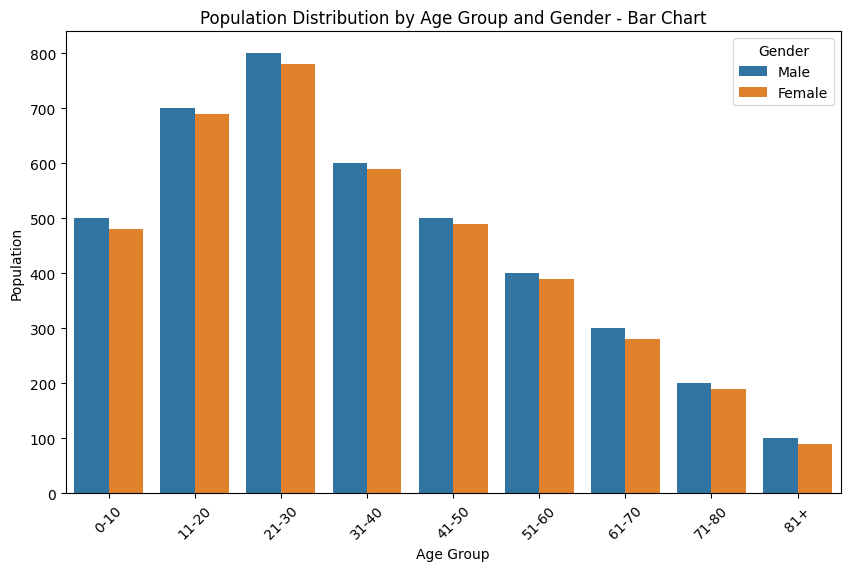

<ipython-input-2-ebfc276ad97e>:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


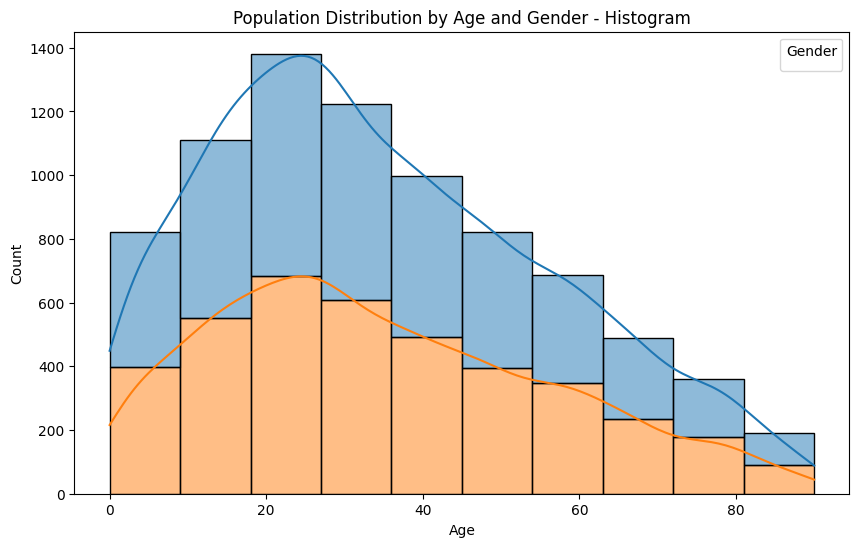

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating a sample dataset
data = {
    'Age Group': ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'],
    'Male': [500, 700, 800, 600, 500, 400, 300, 200, 100],
    'Female': [480, 690, 780, 590, 490, 390, 280, 190, 90]
}

# Loading the data into a Pandas DataFrame
df = pd.DataFrame(data)

# Melting the DataFrame for better visualization
df_melted = df.melt(id_vars='Age Group', var_name='Gender', value_name='Population')

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Population', hue='Gender', data=df_melted)
plt.title('Population Distribution by Age Group and Gender - Bar Chart')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Creating a histogram-like dataset (expanding age groups into individual ages)
expanded_data = []
for index, row in df.iterrows():
    age_range = row['Age Group'].split('-')
    if len(age_range) == 2:
        start, end = int(age_range[0]), int(age_range[1])
    else:
        start, end = 81, 90  # Assuming '81+' means 81-90

    expanded_data.extend([(age, 'Male') for age in np.random.randint(start, end + 1, row['Male'])])
    expanded_data.extend([(age, 'Female') for age in np.random.randint(start, end + 1, row['Female'])])

df_hist = pd.DataFrame(expanded_data, columns=['Age', 'Gender'])

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hist, x='Age', hue='Gender', multiple='stack', bins=10, kde=True)
plt.title('Population Distribution by Age and Gender - Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
